In [1]:
from sqlalchemy import create_engine
from pandasql import sqldf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy.stats as st
from mlxtend.plotting import plot_decision_regions
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

from collections import OrderedDict, Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, f1_score 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
# make prettier plots
%config InlineBackend.figure_format = 'svg'
import datetime

In [2]:
def plot_roc(true, probas):
    auc = roc_auc_score(true, probas)
    plt.plot(fpr, tpr, marker='o')
    plt.plot([0,1],[0,1],c='violet',ls='--')
    plt.xlabel('1 - Specificity (FPR)')
    plt.ylabel('Sensitivity (TPR)');
    plt.title(f"Area Under the ROC Curve: {round(auc, 4)}");

In [3]:
cmp_all= pd.read_csv('cmp1.csv')

# Handling Imbalanced Classes: Stratify=target variable

In [6]:
X_tr_v, X_te, y_tr_v, y_te = train_test_split(cmp_all.drop(['id','success'],axis=1), cmp_all['success'], test_size=0.2, random_state=41, stratify=cmp_all['success'])
X_tr, X_v, y_tr, y_v= train_test_split(X_tr_v1, y_tr_v1, test_size=0.3, random_state=41, stratify=y_tr_v1)

## Multiple Logistic Regression

In [7]:
lm = LogisticRegression()
lm.fit(X_tr, y_tr)
print("training score: {}".format(lm.score(X_tr, y_tr)))
print("testing score: {}".format(lm.score(X_v, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, lm.predict(X_v)))
print(classification_report(y_v, lm.predict(X_v)))

training score: 0.8599961955487921
testing score: 0.8601864181091877
confusion_matrix: 
 [[15475    22]
 [ 2498    29]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     15497
           1       0.57      0.01      0.02      2527

    accuracy                           0.86     18024
   macro avg       0.71      0.51      0.47     18024
weighted avg       0.82      0.86      0.80     18024



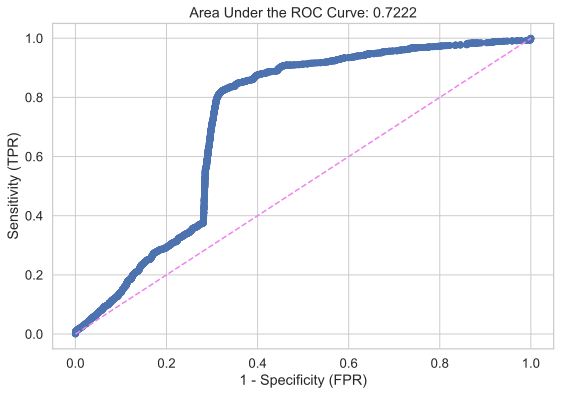

In [8]:
proba=lm.predict_proba(X_v)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)

## Multiple Logistic Regression (Scaler)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr)
y_train = y_tr
X_test = scaler.transform(X_v)

In [10]:
lm1 = LogisticRegression()
lm1.fit(X_train, y_train)
print("training score: {}".format(lm1.score(X_train, y_train)))
print("testing score: {}".format(lm1.score(X_test, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, lm.predict(X_test)))
print(classification_report(y_v, lm1.predict(X_test)))

training score: 0.8780197831462812
testing score: 0.8793275632490013
confusion_matrix: 
 [[10222  5275]
 [  469  2058]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     15497
           1       0.65      0.31      0.41      2527

    accuracy                           0.88     18024
   macro avg       0.77      0.64      0.67     18024
weighted avg       0.86      0.88      0.86     18024



/Users/yuwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


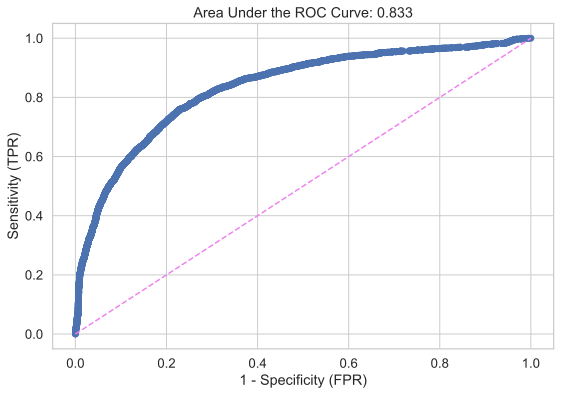

In [11]:
proba=lm1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)

## K Neighbors Classifier

training score: 0.9012982689747004
testing score: 0.8919773635153129
confusion_matrix: 
 [[15105   392]
 [ 1555   972]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     15497
           1       0.71      0.38      0.50      2527

    accuracy                           0.89     18024
   macro avg       0.81      0.68      0.72     18024
weighted avg       0.88      0.89      0.88     18024



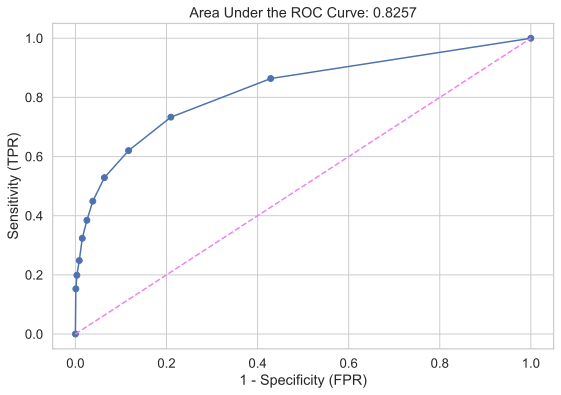

In [31]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_tr, y_tr)
print("training score: {}".format(knn.score(X_tr, y_tr)))
print("testing score: {}".format(knn.score(X_v, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, knn.predict(X_v)))
print(classification_report(y_v, knn.predict(X_v)))

proba=knn.predict_proba(X_v)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)

## Naive Bayes - Gaussian

training score: 0.8563344112611756
testing score: 0.8568020417221482
confusion_matrix: 
 [[15318   179]
 [ 2402   125]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     15497
           1       0.41      0.05      0.09      2527

    accuracy                           0.86     18024
   macro avg       0.64      0.52      0.51     18024
weighted avg       0.80      0.86      0.81     18024



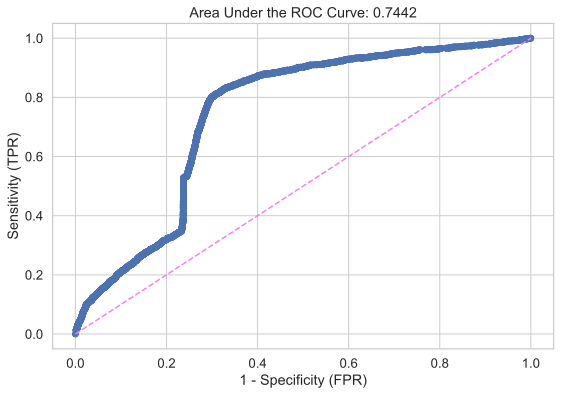

In [14]:
nb = GaussianNB()
nb.fit(X_tr, y_tr)
print("training score: {}".format(nb.score(X_tr, y_tr)))
print("testing score: {}".format(nb.score(X_v, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, nb.predict(X_v)))
print(classification_report(y_v, nb.predict(X_v)))

proba=nb.predict_proba(X_v)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)

## Naive Bayes - Multinomial

training score: 0.8218803500095111
testing score: 0.8262316910785619
confusion_matrix: 
 [[14407  1090]
 [ 2042   485]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     15497
           1       0.31      0.19      0.24      2527

    accuracy                           0.83     18024
   macro avg       0.59      0.56      0.57     18024
weighted avg       0.80      0.83      0.81     18024



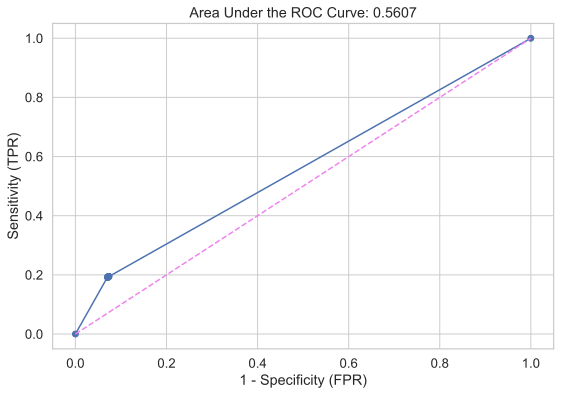

In [15]:
nb1 = MultinomialNB()
nb1.fit(X_tr, y_tr)
print("training score: {}".format(nb1.score(X_tr, y_tr)))
print("testing score: {}".format(nb1.score(X_v, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, nb1.predict(X_v)))
print(classification_report(y_v, nb1.predict(X_v)))

proba=nb1.predict_proba(X_v)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)

## XGB Classifier

/Users/yuwenhuang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:33:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:34:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
training score: 0.9402225603956629
testing score: 0.9197181535730138
confusion_matrix: 
 [[15240   257]
 [ 1190  1337]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     15497
           1       0.84      0.53      0.65      2527

    accuracy                           0.92     18024
   macro avg       0.88      0.76      0.80     18024
weighted avg       0.92      0.92      0.91 

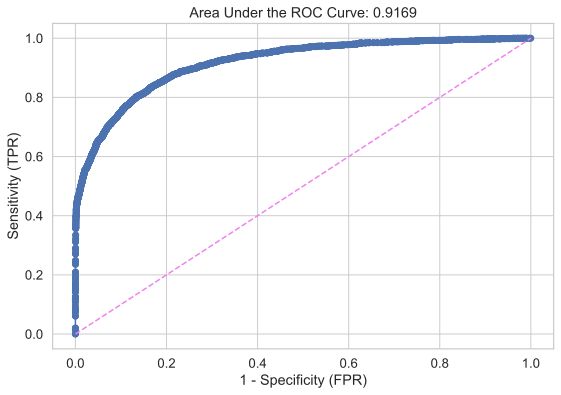

In [16]:
clf = XGBClassifier().fit(X_tr, y_tr)
clf.fit(X_tr, y_tr)
print("training score: {}".format(clf.score(X_tr, y_tr)))
print("testing score: {}".format(clf.score(X_v, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, clf.predict(X_v)))
print(classification_report(y_v, clf.predict(X_v)))

proba=clf.predict_proba(X_v)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)

## Decision Tree Classifier

training score: 0.9159929617652653
testing score: 0.9166111850865513
confusion_matrix: 
 [[15465    32]
 [ 1471  1056]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15497
           1       0.97      0.42      0.58      2527

    accuracy                           0.92     18024
   macro avg       0.94      0.71      0.77     18024
weighted avg       0.92      0.92      0.90     18024



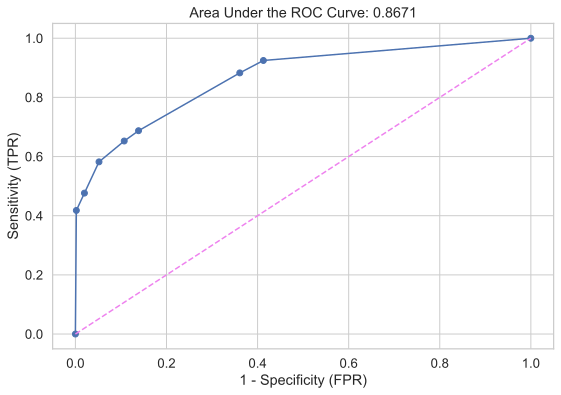

In [34]:
decisiontree = DecisionTreeClassifier(max_depth=3)
decisiontree.fit(X_tr, y_tr)
print("training score: {}".format(decisiontree.score(X_tr, y_tr)))
print("testing score: {}".format(decisiontree.score(X_v, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, decisiontree.predict(X_v)))
print(classification_report(y_v, decisiontree.predict(X_v)))

proba=decisiontree.predict_proba(X_v)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)

## Random Forest

training score: 0.9997622217995055
testing score: 0.919329782512206
confusion_matrix: 
 [[15337   160]
 [ 1294  1233]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     15497
           1       0.89      0.49      0.63      2527

    accuracy                           0.92     18024
   macro avg       0.90      0.74      0.79     18024
weighted avg       0.92      0.92      0.91     18024



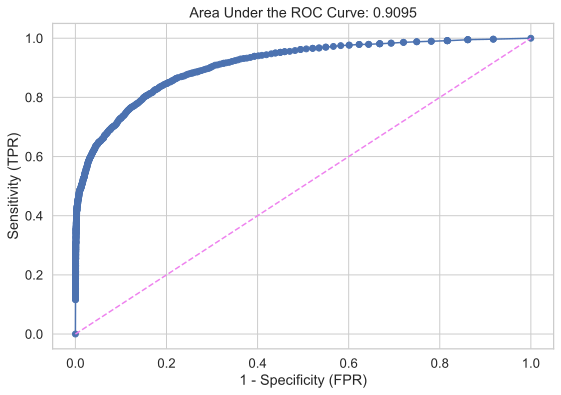

In [36]:
randomforest = RandomForestClassifier(n_estimators=500)
randomforest.fit(X_tr, y_tr)
print("training score: {}".format(randomforest.score(X_tr, y_tr)))
print("testing score: {}".format(randomforest.score(X_v, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, randomforest.predict(X_v)))
print(classification_report(y_v, randomforest.predict(X_v)))

proba=randomforest.predict_proba(X_v)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)

# Handling Imbalanced Classes-Oversampling

In [17]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_tr,y_tr)

In [18]:
Counter(y_resampled) # balanced classes!

Counter({0: 36161, 1: 36161})

## K Neighbors Classifier

training score: 0.8751002461215122
testing score: 0.7713049267643143
confusion_matrix: 
 [[12117  3380]
 [  742  1785]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     15497
           1       0.35      0.71      0.46      2527

    accuracy                           0.77     18024
   macro avg       0.64      0.74      0.66     18024
weighted avg       0.86      0.77      0.80     18024



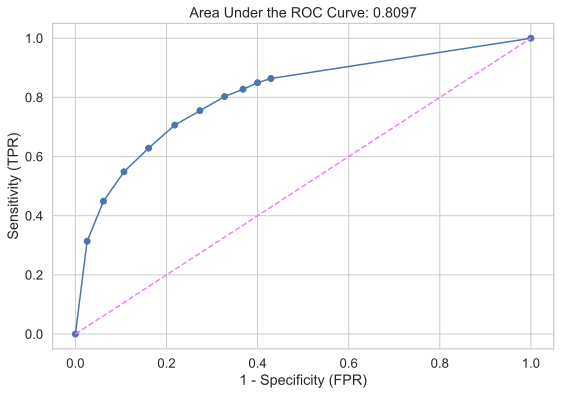

In [32]:
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_resampled, y_resampled)
print("training score: {}".format(knn1.score(X_resampled, y_resampled)))
print("testing score: {}".format(knn1.score(X_v, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, knn1.predict(X_v)))
print(classification_report(y_v, knn1.predict(X_v)))

proba=knn1.predict_proba(X_v)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)

## XGB Classifier

[20:39:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
training score: 0.8875584192915019
testing score: 0.8642365734576121
confusion_matrix: 
 [[13592  1905]
 [  542  1985]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     15497
           1       0.51      0.79      0.62      2527

    accuracy                           0.86     18024
   macro avg       0.74      0.83      0.77     18024
weighted avg       0.90      0.86      0.88 

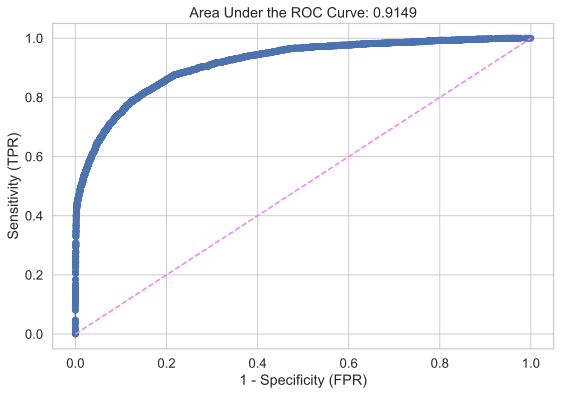

In [21]:
clf1 = XGBClassifier().fit(X_resampled, y_resampled)

print("training score: {}".format(clf1.score(X_resampled, y_resampled)))
print("testing score: {}".format(clf1.score(X_v, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, clf1.predict(X_v)))
print(classification_report(y_v, clf1.predict(X_v)))

proba=clf1.predict_proba(X_v)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)

# SMOTE- Synthetic Minority Oversampling Technique

In [25]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_tr1,y_tr1)

In [26]:
Counter(y_smoted)

Counter({0: 36161, 1: 36161})

## XGB Classifier

[20:47:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
training score: 0.9600813030613091
testing score: 0.9168331114070128
confusion_matrix: 
 [[15161   336]
 [ 1163  1364]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     15497
           1       0.80      0.54      0.65      2527

    accuracy                           0.92     18024
   macro avg       0.87      0.76      0.80     18024
weighted avg       0.91      0.92      0.91     18024



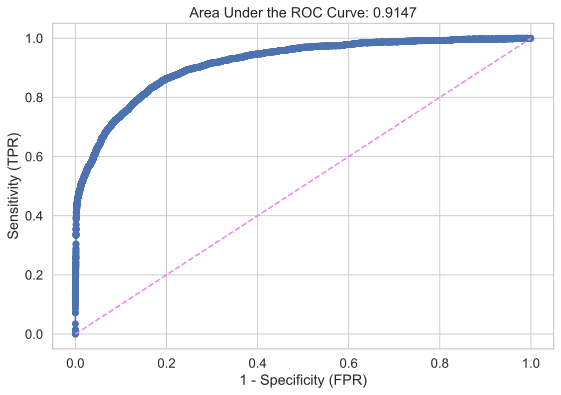

In [29]:
clf2 = XGBClassifier().fit(X_smoted, y_smoted)

print("training score: {}".format(clf2.score(X_smoted, y_smoted)))
print("testing score: {}".format(clf2.score(X_v, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, clf2.predict(X_v)))
print(classification_report(y_v, clf2.predict(X_v)))

proba=clf2.predict_proba(X_v)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)

## Decision-Tree Classifier

training score: 0.8088963247697796
testing score: 0.8047048379937861
confusion_matrix: 
 [[12725  2772]
 [  748  1779]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88     15497
           1       0.39      0.70      0.50      2527

    accuracy                           0.80     18024
   macro avg       0.67      0.76      0.69     18024
weighted avg       0.87      0.80      0.83     18024



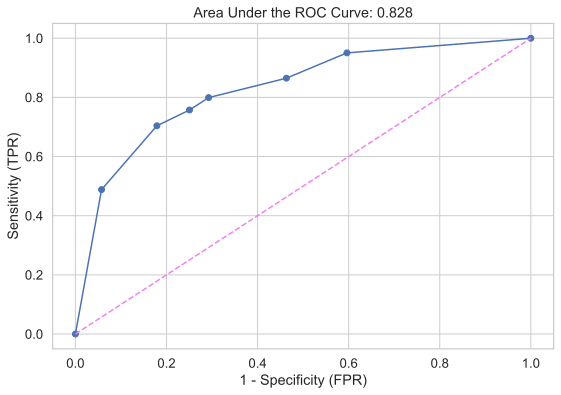

In [33]:
decisiontree1 = DecisionTreeClassifier(max_depth=3)
decisiontree1.fit(X_smoted, y_smoted)
print("training score: {}".format(decisiontree1.score(X_smoted, y_smoted)))
print("testing score: {}".format(decisiontree1.score(X_v, y_v)))
print("confusion_matrix: \n", confusion_matrix(y_v, decisiontree1.predict(X_v)))
print(classification_report(y_v, decisiontree1.predict(X_v)))

proba=decisiontree1.predict_proba(X_v)[:,1]
fpr, tpr, thresholds = roc_curve(y_v, proba)
plot_roc(y_v, proba)